In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
airbnb=pd.read_csv('airbnb.csv')

In [3]:
airbnb.shape

(12805, 23)

In [4]:
airbnb.dtypes

Unnamed: 0        int64
id                int64
name             object
rating           object
reviews          object
host_name        object
host_id         float64
address          object
features         object
amenities        object
safety_rules     object
hourse_rules     object
img_links        object
price             int64
country          object
bathrooms         int64
beds              int64
guests            int64
toiles            int64
bedrooms          int64
studios           int64
checkin          object
checkout         object
dtype: object

In [5]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12805 entries, 0 to 12804
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    12805 non-null  int64  
 1   id            12805 non-null  int64  
 2   name          12805 non-null  object 
 3   rating        12805 non-null  object 
 4   reviews       12805 non-null  object 
 5   host_name     12797 non-null  object 
 6   host_id       12805 non-null  float64
 7   address       12805 non-null  object 
 8   features      12805 non-null  object 
 9   amenities     12805 non-null  object 
 10  safety_rules  12805 non-null  object 
 11  hourse_rules  12805 non-null  object 
 12  img_links     12805 non-null  object 
 13  price         12805 non-null  int64  
 14  country       12805 non-null  object 
 15  bathrooms     12805 non-null  int64  
 16  beds          12805 non-null  int64  
 17  guests        12805 non-null  int64  
 18  toiles        12805 non-nu

In [6]:
airbnb.duplicated().sum()
airbnb.drop_duplicates(inplace=True)

In [7]:
airbnb.isnull().sum()

Unnamed: 0         0
id                 0
name               0
rating             0
reviews            0
host_name          8
host_id            0
address            0
features           0
amenities          0
safety_rules       0
hourse_rules       0
img_links          0
price              0
country            0
bathrooms          0
beds               0
guests             0
toiles             0
bedrooms           0
studios            0
checkin          800
checkout        2450
dtype: int64

In [10]:
df=airbnb

In [11]:
def clean_data(df):
    # Handle missing values
    df = df.dropna(subset=['price', 'rating'])
    df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)
    return df

In [29]:
print(airbnb.columns)

Index(['Unnamed: 0', 'name', 'rating', 'reviews', 'address', 'features',
       'amenities', 'price', 'country', 'bathrooms', 'beds', 'guests',
       'bedrooms'],
      dtype='object')


In [30]:
columns_to_drop = ['checkin', 'checkout', 'host_name']
airbnb.drop(columns=[col for col in columns_to_drop if col in airbnb.columns], inplace=True)

In [31]:
airbnb.describe()

,Unnamed: 0,price,bathrooms,beds,guests,bedrooms
count,12805.000000,1.280500e+04,12805.000000,12805.000000,12805.000000,12805.000000
mean,6402.000000,1.769780e+04,1.874424,3.316751,5.213745,2.136041
std,3696.629433,4.569364e+04,2.091399,4.037791,3.808830,2.359005
min,0.000000,3.930000e+02,0.000000,0.000000,1.000000,0.000000
25%,3201.000000,3.994000e+03,1.000000,1.000000,2.000000,1.000000
50%,6402.000000,8.175000e+03,1.000000,2.000000,4.000000,1.000000
75%,9603.000000,1.606200e+04,2.000000,4.000000,6.000000,3.000000
max,12804.000000,1.907963e+06,50.000000,98.000000,16.000000,50.000000


In [34]:
def parse_address(address):
    parts = address.split(',')
    if len(parts) == 3:
        return parts[0].strip(), parts[1].strip(), parts[2].strip()
    elif len(parts) == 2:
        return parts[0].strip(), None, parts[1].strip()
    else:
        return None, None, None
    
df[['city', 'region', 'country']] = df['address'].apply(parse_address).tolist()

In [35]:
print(df['country'].value_counts())
print(df['city'].value_counts())


country
India        2730
Italy         928
Greece        875
Thailand      658
Turkey        519
             ... 
Congo           1
Kosovo          1
St Martin       1
Guatemala       1
Senegal         1
Name: count, Length: 118, dtype: int64
city
Pantelleria          199
New Delhi            194
Gudauri              189
Manali               181
Marrakesh            114
                    ... 
Forio                  1
Kecamatan Ngaglik      1
Pandukeshwar           1
Bolu                   1
Horní Podluží          1
Name: count, Length: 5379, dtype: int64


In [36]:
airbnb.head(5)

,Unnamed: 0,name,rating,reviews,address,features,amenities,price,country,bathrooms,beds,guests,bedrooms,city,region
0,0,Perla bungalov,4.71,64,"Kartepe, Kocaeli, Turkey","2 guests,2 bedrooms,1 bed,1 bathroom","Mountain view,Valley view,Lake access,Kitchen,...",8078,Turkey,1,1,2,2,Kartepe,Kocaeli
1,1,Authentic Beach Architect Sheltered Villa with...,New,0,"Kaş, Antalya, Turkey","4 guests,2 bedrooms,2 beds,2 bathrooms","Kitchen,Wifi,Dedicated workspace,Free parking ...",4665,Turkey,2,2,4,2,Kaş,Antalya
2,2,cottages sataplia,4.85,68,"Imereti, Georgia","4 guests,1 bedroom,3 beds,1 bathroom","Mountain view,Kitchen,Wifi,Dedicated workspace...",5991,Georgia,1,3,4,1,Imereti,None
3,3,Sapanca Breathable Bungalow,5.0,13,"Sapanca, Sakarya, Turkey","4 guests,1 bedroom,2 beds,1 bathroom","Mountain view,Valley view,Kitchen,Wifi,Free pa...",11339,Turkey,1,2,4,1,Sapanca,Sakarya
4,4,Bungalov Ev 2,New,0,"Sapanca, Sakarya, Turkey","2 guests,1 bedroom,1 bed,1 bathroom","Kitchen,Wifi,Free parking on premises,TV,Air c...",6673,Turkey,1,1,2,1,Sapanca,Sakarya


In [43]:
columns_to_drop = ['amenities', 'address', ' ']
airbnb.drop(columns=[col for col in columns_to_drop if col in airbnb.columns], inplace=True)

In [45]:
airbnb.head(2)

,Unnamed: 0,name,rating,reviews,features,price,country,bathrooms,beds,guests,bedrooms,city,region
0,0,Perla bungalov,4.71,64,"2 guests,2 bedrooms,1 bed,1 bathroom",8078,Turkey,1,1,2,2,Kartepe,Kocaeli
1,1,Authentic Beach Architect Sheltered Villa with...,New,0,"4 guests,2 bedrooms,2 beds,2 bathrooms",4665,Turkey,2,2,4,2,Kaş,Antalya


In [46]:
df['reviews'] = pd.to_numeric(df['reviews'], errors='coerce')
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

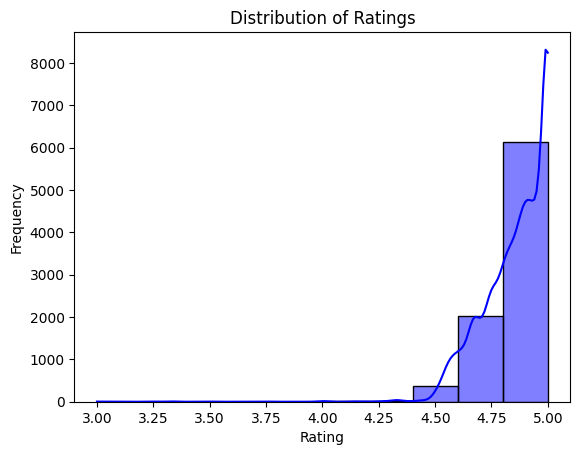

In [47]:
sns.histplot(df['rating'], bins=10, kde=True, color='blue')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


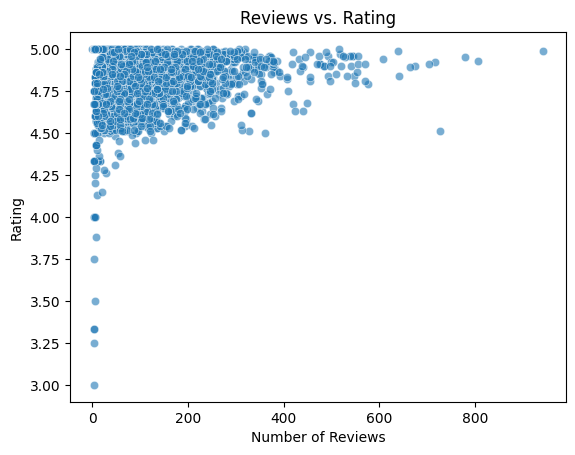

In [48]:
sns.scatterplot(x='reviews', y='rating', data=df, alpha=0.6)
plt.title('Reviews vs. Rating')
plt.xlabel('Number of Reviews')
plt.ylabel('Rating')
plt.show()

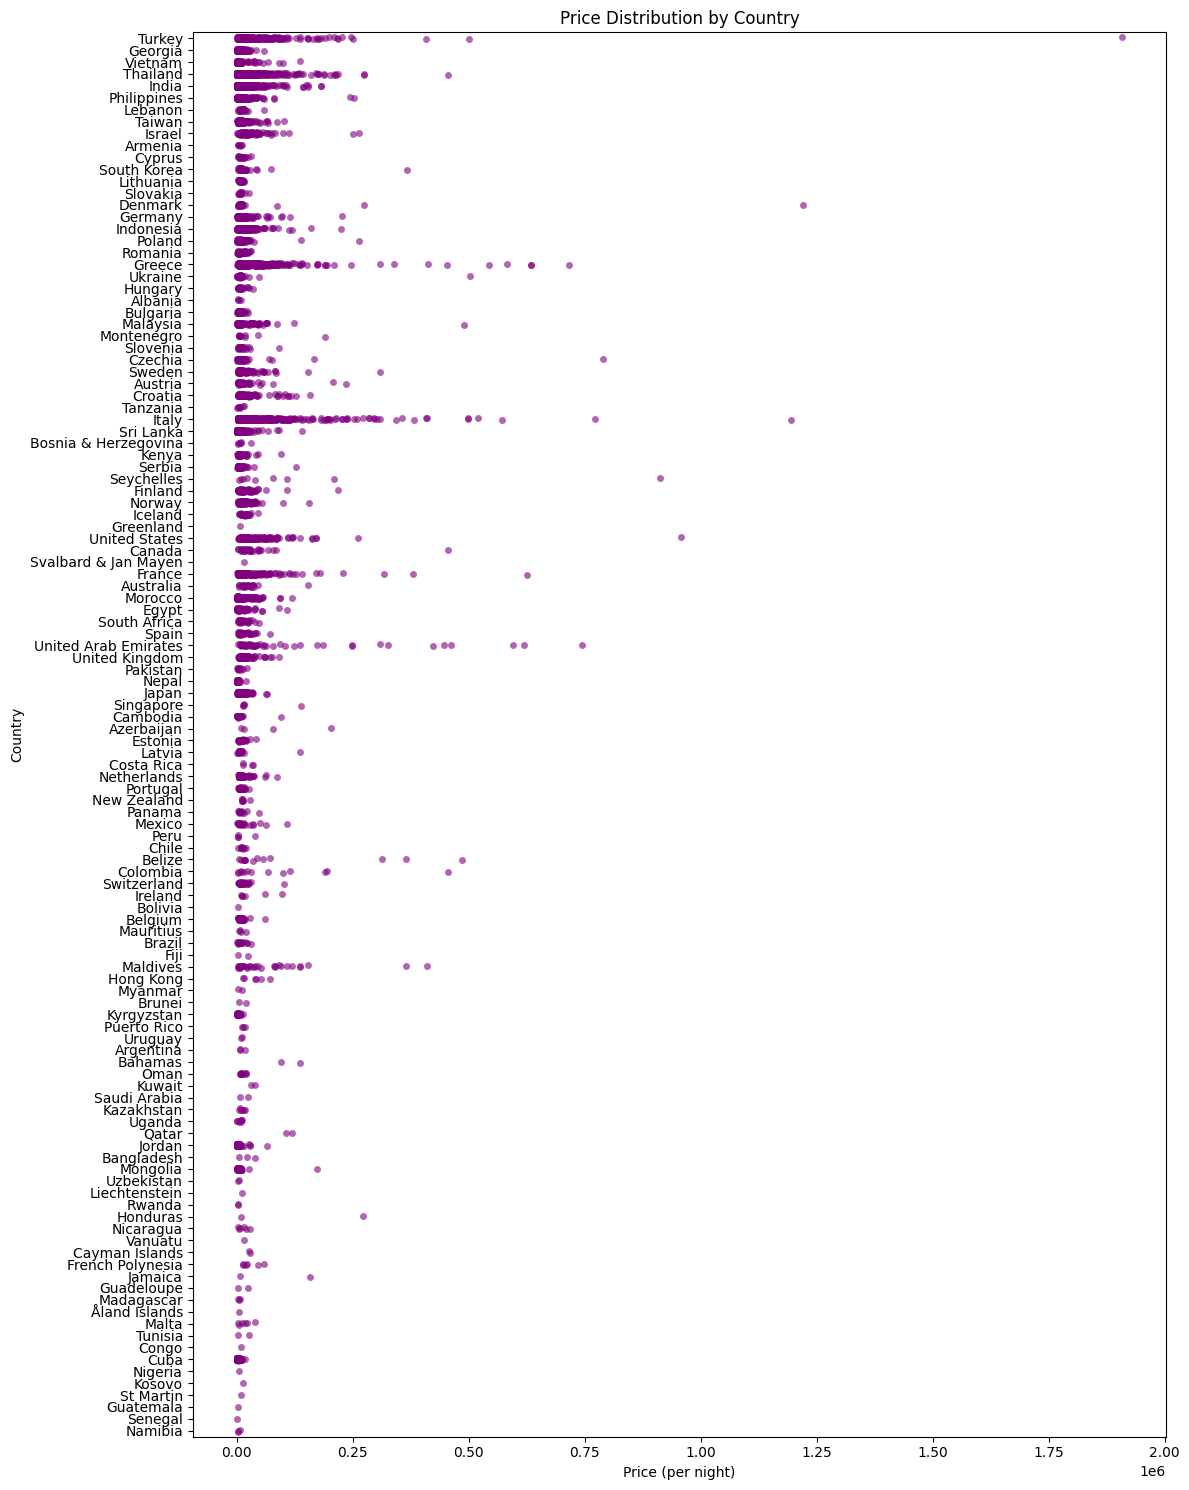

In [58]:
# Price distribution by country (strip plot)
plt.figure(figsize=(12, 15))
sns.stripplot(x='price', y='country', data=df, jitter=True, color='purple', alpha=0.6)
plt.title('Price Distribution by Country')
plt.xlabel('Price (per night)')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

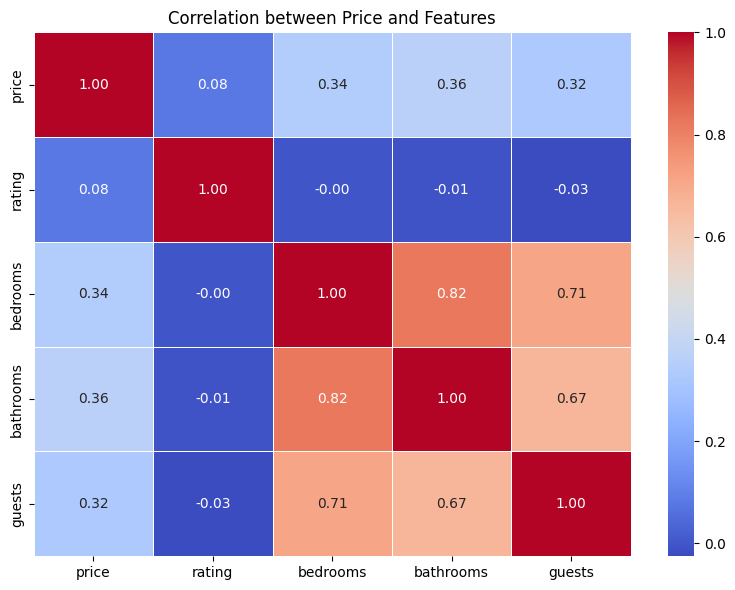

In [59]:
# Heatmap of price vs multiple features
corr = df[['price', 'rating', 'bedrooms', 'bathrooms', 'guests']].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation between Price and Features')
plt.tight_layout()
plt.show()

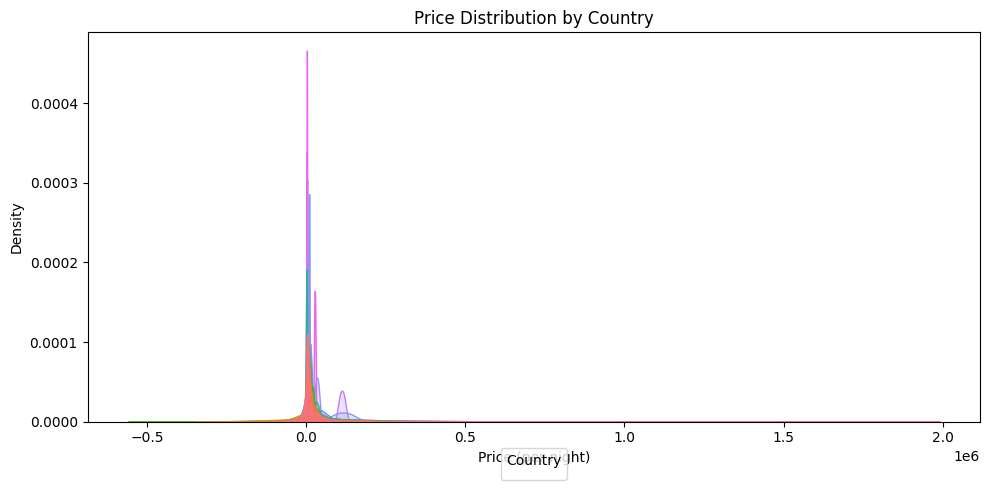

In [73]:
# KDE plot for price distribution by country with a horizontal legend outside the plot area
plt.figure(figsize=(10, 5))

# Create the KDE plot with different hues for each country
sns.kdeplot(data=df, x='price', hue='country', fill=True, common_norm=False)

# Add titles and labels
plt.title('Price Distribution by Country')
plt.xlabel('Price (per night)')
plt.ylabel('Density')

# Adjust the legend to be horizontal and place it outside the plot
plt.legend(title='Country', bbox_to_anchor=(0.5, -0.05), loc='upper center', ncol=len(df['country'].unique()), fontsize=10)

# Show the plot with adjusted layout
plt.tight_layout()
plt.show()


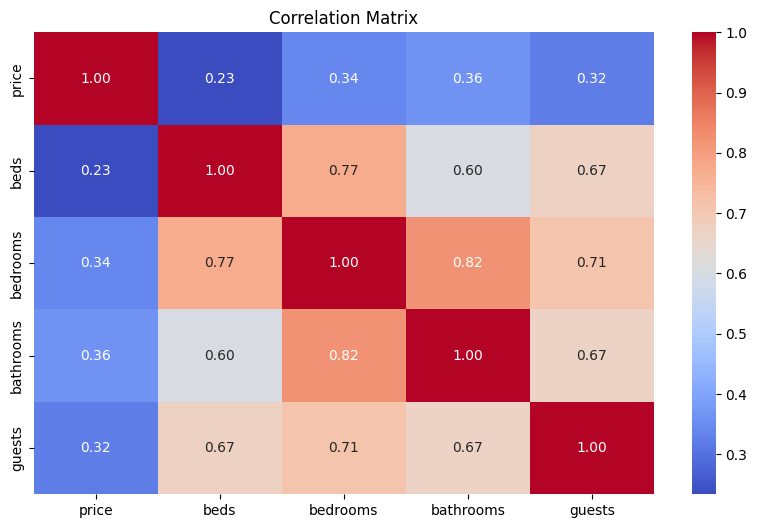

In [76]:
# Correlation between price and other numerical features
plt.figure(figsize=(10,6))
correlation_matrix = df[['price', 'beds', 'bedrooms', 'bathrooms', 'guests']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

Average Guests Capacity by Country:
 country
Bangladesh       12.000000
Honduras         11.000000
Tunisia          11.000000
Colombia         10.615385
Bahamas          10.000000
                   ...    
Myanmar           2.000000
Åland Islands     2.000000
Senegal           2.000000
Guatemala         1.000000
Nigeria           1.000000
Name: guests, Length: 118, dtype: float64


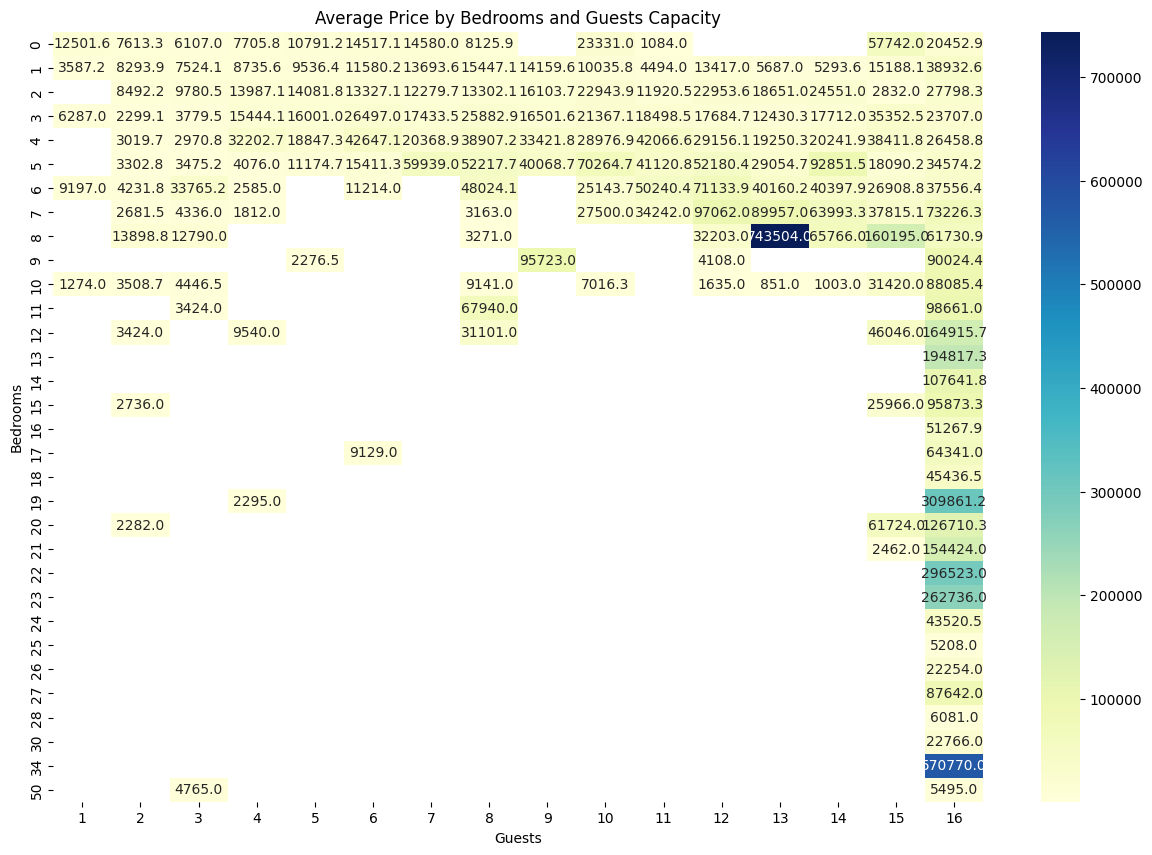

In [81]:
# Average guests capacity by country
avg_guests_country = df.groupby('country')['guests'].mean().sort_values(ascending=False)
print("Average Guests Capacity by Country:\n", avg_guests_country)

# Bedrooms vs. Guests capacity heatmap
plt.figure(figsize=(15,10))
bedroom_guest_pivot = df.pivot_table(index='bedrooms', columns='guests', values='price', aggfunc='mean')
sns.heatmap(bedroom_guest_pivot, cmap='YlGnBu', annot=True, fmt='.1f', cbar=True)
plt.title('Average Price by Bedrooms and Guests Capacity')
plt.xlabel('Guests')
plt.ylabel('Bedrooms')
plt.show()

In [83]:
# Top 10 most reviewed listings
most_reviewed = df.sort_values('reviews', ascending=False).head(10)
print("Top 10 Most Reviewed Listings:\n", most_reviewed[['name', 'reviews', 'rating', 'price']])



Top 10 Most Reviewed Listings:
                                                 name  reviews  rating  price
512    Nónsteinn -2-  Enjoy life in the countryside.    943.0    4.99  18171
534                       Lumbar Pearl / Ocean Pearl    807.0    4.93  15445
1377    Domeland:  Off-grid Adobe Dome near Big Bend    780.0    4.95  11071
338                        Guesthouse Hof í Vatnsdal    726.0    4.51   8995
1418                           Treehouse at Danville    716.0    4.92  21090
1490                      Taos Mesa Studio Earthship    703.0    4.91  15505
588               Apartment in the heart of Florence    675.0    4.90   8244
10777                  Dream Art Studio in the Gunks    665.0    4.89  24441
2130      Beautiful villa on the edge of BLUE LAGOON    642.0    4.84  12894
10807         2nd Floor King Bed, Edradour N.E. Bend    638.0    4.99   6736


In [85]:
# Average rating by country
avg_rating_country = df.groupby('country')['rating'].mean().sort_values(ascending=False)
print("Average Rating by Country:\n", avg_rating_country)

Average Rating by Country:
 country
Armenia      5.0
Honduras     5.0
Tunisia      5.0
Oman         5.0
Myanmar      5.0
            ... 
Greenland    NaN
Kosovo       NaN
Kuwait       NaN
Qatar        NaN
Rwanda       NaN
Name: rating, Length: 118, dtype: float64


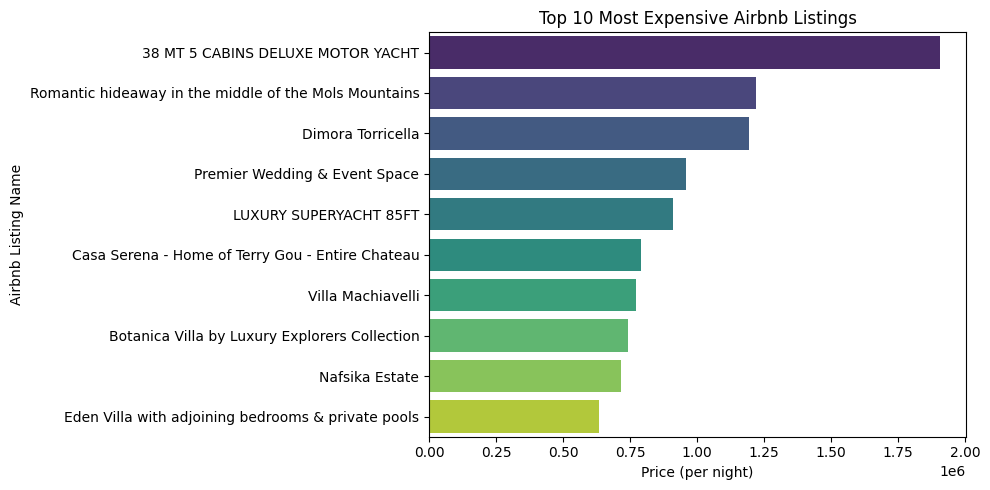

In [96]:
# Bar plot for top 10 most expensive Airbnb listings
top_expensive_airbnb = df.nlargest(10, 'price')  # Top 10 most expensive listings

plt.figure(figsize=(10, 5))
sns.barplot(x='price', y='name', data=top_expensive_airbnb, palette='viridis')

# Add labels and title
plt.title('Top 10 Most Expensive Airbnb Listings')
plt.xlabel('Price (per night)')
plt.ylabel('Airbnb Listing Name')

# Show plot
plt.tight_layout()
plt.show()


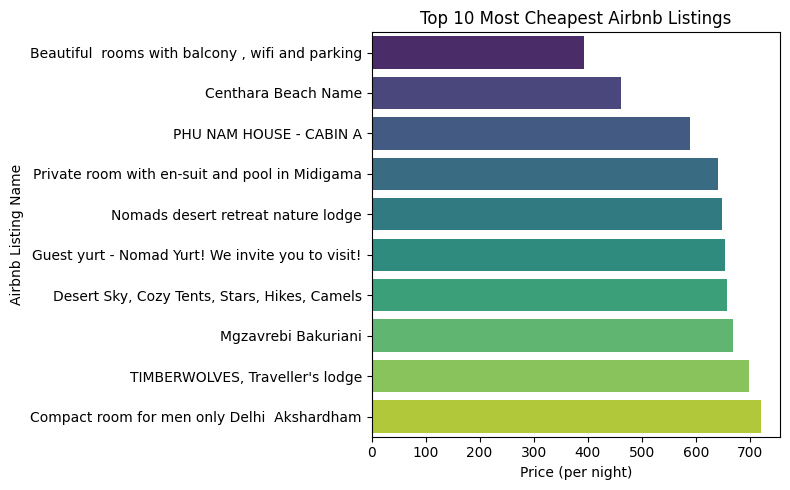

In [97]:
# Bar plot for top 10 most cheapest Airbnb listings
top_cheapest_airbnb = df.nsmallest(10, 'price')  # Top 10 most cheapest listings

plt.figure(figsize=(8, 5))
sns.barplot(x='price', y='name', data=top_cheapest_airbnb, palette='viridis')

# Add labels and title
plt.title('Top 10 Most Cheapest Airbnb Listings')
plt.xlabel('Price (per night)')
plt.ylabel('Airbnb Listing Name')

# Show plot
plt.tight_layout()
plt.show()


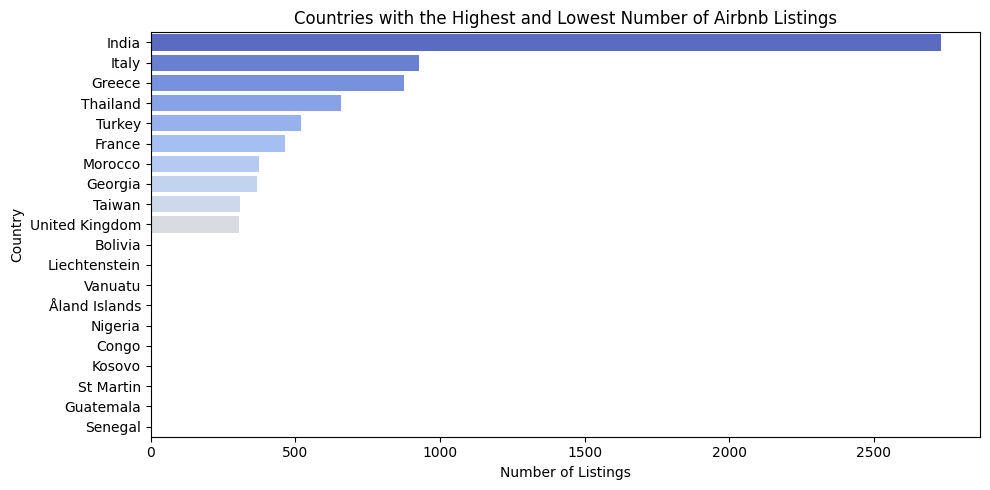

In [93]:
# Count the number of listings per country
country_counts = df['country'].value_counts()

# Get top 10 countries with the highest number of listings
top_countries = country_counts.head(10)

# Get bottom 10 countries with the least number of listings
bottom_countries = country_counts.tail(10)

# Combine the two for comparison
combined_countries = pd.concat([top_countries, bottom_countries])

# Plotting
plt.figure(figsize=(10, 5))
sns.barplot(x=combined_countries.values, y=combined_countries.index, palette='coolwarm')

# Add labels and title
plt.title('Countries with the Highest and Lowest Number of Airbnb Listings')
plt.xlabel('Number of Listings')
plt.ylabel('Country')

# Show plot
plt.tight_layout()
plt.show()
